In [14]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [15]:
df = pd.read_csv('exams.csv')

In [16]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [17]:
# Get rid of column 'race/ethnicity' as there was no indication 
# or clearance what each group means and most likely it is not
# defining factor in this study
df = df.drop('race/ethnicity', axis=1)

In [18]:
# change 'gender' column into numerical values where 0 represents 'male' and 1 represents 'female'
#df = df.replace({'male': 0, 'female': 1})

# convert Gender into numeric format
# this just converts the value of column to 0 or 1
# factorize in pandas works too, but only one column at a time
from sklearn.preprocessing import LabelEncoder
variables = ['gender']
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

# Change unique values in column where 'high school' is 0, 'some high school' is 1,
# 'some college' is 2, 'assocate's degree is 3, 'bachelor's degree is 4 and
# 'master's degree is 5
df = df.replace({"high school": 0 , "some high school": 1, "some college": 2,
                 "associate's degree": 3, "bachelor's degree": 4, "master's degree": 5})

# Change values in 'lunch' column fro 'free/reduced' for 1 and standard(not free) for 0
df = df.replace({'free/reduced': 0, 'standard': 1})

# Change values for 'test preparation course' for none(not completed) into 0 and completed into 1
df = df.replace({'none': 0, 'completed': 1})

df

C:\Users\vilil\AppData\Local\Temp\ipykernel_2740\293414200.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"high school": 0 , "some high school": 1, "some college": 2,
C:\Users\vilil\AppData\Local\Temp\ipykernel_2740\293414200.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'free/reduced': 0, 'standard': 1})
C:\Users\vilil\AppData\Local\Temp\ipykernel_2740\293414200.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,1,1,67,67,63
1,0,1,0,0,40,59,55
2,1,2,0,0,59,60,50
3,1,0,1,0,77,78,68
4,1,3,1,1,78,73,68
...,...,...,...,...,...,...,...
995,1,0,1,0,73,70,65
996,1,3,0,1,85,91,92
997,0,1,0,0,32,35,41
998,0,2,1,0,73,74,82


In [19]:
# check for duplicated values
df.duplicated().sum()

2

In [20]:
# drop 2 duplicates
df = df.drop_duplicates()

In [21]:
# all duplicates gone
df.duplicated().sum()

0

In [22]:
df.isna().sum()

gender                         0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<b>Train / Test split

In [23]:
df.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [25]:
# if you  have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
X = df[['gender', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score']]

# have only the target variable here (dependent variable)
y = df['parental level of education']

In [ ]:
#TRY THIS OUT!!


# evaluate xgboost random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)

estimator = XGBClassifier (
    tree_method = "gpu_hist",
    gpu_id = 0,
    n_gpus = 4,
    device = "cuda",
    objective = "binary:logistic",
    nthreads = 4,
    seed = 42
)

param_grid = {
    'C': [1000],
    #"epsilon": [0.075, 0.1, 0.15, 0.2],
    #"nu": [0.15, 0.2, 0.25, 0.3, 0.4, 0.45],
    "gamma": [0.075],
    "kernel": ["rbf"]
}

#GridSearchCV(n_estimators=100, subsample=0.9, colsample_bynode=0.28)

model = make_pipeline(StandardScaler(), GridSearchCV(estimator, param_grid, refit=True, verbose = 3, error_score="raise"))

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=1)

print("using xgboost's randomforest classifer XGBClassifier")
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

model.fit(X, y)

yhat = model.predict(X_test)

model[1].best_params_
model[1].best_score_


In [26]:
# Create train test split with 30 % of data reserved for testing and 
# 70 % reserved for training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
# Create empty random forest regression model 
# and fit the data
lm = make_pipeline(RandomForestRegressor())
lm.fit(X_train, y_train)

Pipeline(steps=[('randomforestregressor', RandomForestRegressor())])

In [28]:
# make test predictions with new data with our model
predictions = lm.predict(X_test)

In [30]:
df['parental level of education'].describe()

count    998.000000
mean       2.040080
std        1.511042
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: parental level of education, dtype: float64

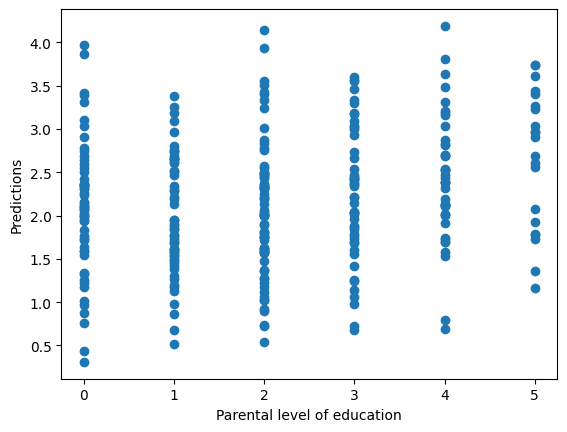

In [35]:
plt.scatter(y_test, predictions)

plt.xlabel('Parental level of education')
plt.ylabel('Predictions')

plt.show()

<Axes: xlabel='parental level of education', ylabel='math score'>

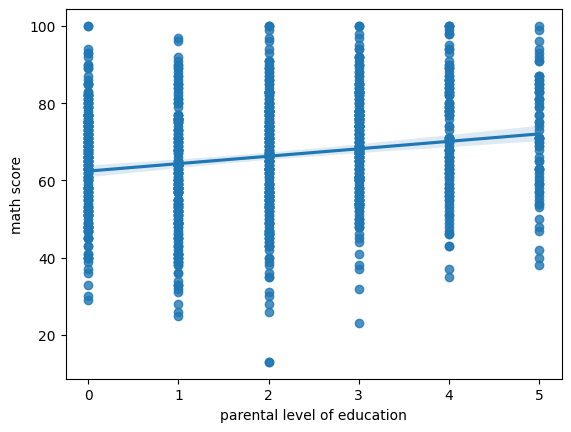

In [38]:
# use the function regplot to make a scatterplot
sns.regplot(x=df["parental level of education"], y=df['math score'])

In [41]:
df

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,1,1,67,67,63
1,0,1,0,0,40,59,55
2,1,2,0,0,59,60,50
3,1,0,1,0,77,78,68
4,1,3,1,1,78,73,68
...,...,...,...,...,...,...,...
995,1,0,1,0,73,70,65
996,1,3,0,1,85,91,92
997,0,1,0,0,32,35,41
998,0,2,1,0,73,74,82


In [48]:
# Trying new value to see if model works as intended 
tester_row = {
    'gender': 1,
    #'parental level of education': 3, # 0-3
    'lunch': 1, 
    'test preparation course': 0,
    'math score': 100, # / 100
    'reading score': 100, # / 100
    'writing score': 100 # / 100
}

# create a pandas DataFrame
tester_row = pd.DataFrame([tester_row])

In [49]:
# use our model to predict our tester_row data
result = lm.predict(tester_row)[0]

print()
print(f"Predicted parental education level:")
print(f"{round(float(result), 2)} education level (0 - 5)")
print("----------------")

import math
lower_level = math.floor(result)
upper_level = math.ceil(result)

print(f"Parental education level is in range of: {lower_level} - {upper_level}")


Predicted parental education level:
3.72 education level (0 - 5)
----------------
Parental education level is in range of: 3 - 4


In [50]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2), " quality level")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2), "quality level^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2), "quality level")

# R-squared. 0 = the model describes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))

MAE
1.27  quality level

MSE
2.4 quality level^2

RMSE:
1.55 quality level

R-squared:
-0.04
